<a href="https://colab.research.google.com/github/ella4-boop/patents/blob/main/patentsandgrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")


In [2]:
gdppercapita_df=pd.read_csv('https://raw.githubusercontent.com/ella4-boop/patents/refs/heads/main/gdppercapita2.csv')
gdppercapita_df = gdppercapita_df.pivot(index="country", columns='year', values="gdp/capita")
gdppercapita_df = gdppercapita_df.reset_index()


gdppercapita_df.tail()

year,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
208,Vanuatu,3101.6807,3120.6938,3122.8894,3069.8060,3269.6284,3226.9150,3229.1023,3315.4814,3285.1384,...,3320.3792,3259.1482,3336.8975,3465.9197,3482.0227,3512.0720,3259.9954,3135.8367,3122.6401,3118.3960
209,Vietnam,2467.9646,2560.8438,2726.4736,2890.4243,3089.6094,3328.2148,3584.0290,3820.3025,3982.9580,...,8751.8830,9248.0240,9743.1880,10290.5490,10936.8940,11628.6140,11851.3960,12048.9020,12930.2560,13491.8800
210,World,11262.5910,11168.1700,11127.4930,11117.1460,11237.7440,11410.4320,11655.7460,11939.2100,12062.6520,...,17370.5700,17734.9840,18098.4550,18575.7250,19046.8090,19401.6930,18662.1680,19702.8400,20197.2540,20670.9410
211,Zambia,2425.1113,2364.8623,2268.4980,2365.6296,2110.5833,2119.9565,2197.1956,2223.4575,2157.5735,...,3585.5774,3576.9255,3598.1716,3612.5059,3646.9597,3591.5642,3391.5955,3503.0350,3585.1238,3673.4841
212,Zimbabwe,4013.2990,4126.4053,3649.8918,3634.7505,3965.7310,3935.2800,4271.4800,4304.4062,4342.8584,...,3360.5522,3382.9230,3366.3442,3453.5098,3572.9836,3294.8062,2987.2698,3184.7854,3323.1218,3442.2512


In [3]:
selected_countries= ["China", "Finland", "India", "Poland", "Brazil", "South Korea", "Russia", "Turkey", "United Kingdom", "United States"]
gdp_df = gdppercapita_df[gdppercapita_df["country"].isin(selected_countries)]
gdp_df.head(11)

year,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
25,Brazil,12633.288,12546.5610,12271.9790,12669.4290,13202.9310,13550.4390,13641.6300,13896.6250,13737.7030,...,19183.1720,18357.068,17620.928,17724.480,17917.750,18018.6210,17327.516,18075.7050,18554.047,19018.238
38,China,1645.579,1773.6394,2001.2543,2253.0520,2518.1548,2763.7998,3006.3628,3250.6145,3472.1785,...,13696.5180,14575.935,15485.213,16461.070,17490.166,18465.2990,18833.785,20406.7300,21011.617,22137.600
66,Finland,39167.863,36663.7600,35251.0500,34807.3320,36031.5800,37414.2200,38657.5550,41008.6170,43130.6880,...,53200.7230,53273.140,54486.460,56154.418,56749.004,57451.6300,55940.074,57350.8700,58024.477,57063.523
86,India,2203.147,2178.6860,2249.6980,2307.6072,2411.4626,2542.4220,2680.2788,2734.5210,2847.9624,...,6079.8438,6488.146,6940.626,7326.607,7714.340,7930.0913,7399.531,8050.0186,8544.688,9160.063
153,Poland,13044.731,12086.6230,12352.6580,12781.8740,13430.0240,14475.3200,15345.7500,16310.8920,17058.6170,...,30863.1200,32252.387,33244.300,34952.836,37136.016,38846.5040,38122.438,41774.5820,44160.860,44384.168
158,Russia,29945.146,28352.4360,24209.0330,22122.2910,19348.2010,18550.5200,17879.9220,18160.2290,17226.2270,...,36217.9650,35393.570,35361.547,35932.234,36908.367,37698.9530,36746.375,38938.4960,38263.617,39753.457
179,South Korea,13883.375,15228.2580,16005.0190,16932.8750,18317.0980,19877.1930,21242.2830,22342.5550,21044.0470,...,41648.2460,42593.008,43674.508,44928.050,46034.290,46903.8400,46506.934,48571.4340,49933.977,50572.250
195,Turkey,12124.939,11999.2900,12390.4870,13110.3910,12282.9720,13035.5470,13788.1590,14620.1520,14764.5920,...,24830.5740,25992.297,26497.135,28117.953,28575.762,28400.7000,28649.550,31637.5300,33061.047,34609.914
202,United Kingdom,35586.742,35085.5080,35131.0940,35919.5820,37206.2070,38047.3600,38930.4900,40742.6050,42006.3500,...,51100.3360,51823.973,52421.082,53449.293,53872.934,54440.1050,48656.164,52872.1950,54805.445,54542.016
203,United States,44378.523,43742.0270,44659.1520,45286.9340,46537.3550,47220.9570,48435.7000,49984.2700,51619.8700,...,63191.2460,64575.406,65275.570,66458.020,68070.210,69511.7660,67352.390,71318.3050,72841.920,74577.510


In [4]:
gdp_df['country'] = gdp_df['country'].replace("Turkey", "Türkiye")
gdp_df.head(11)

<ipython-input-4-65855b79a054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df['country'] = gdp_df['country'].replace("Turkey", "Türkiye")


year,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
25,Brazil,12633.288,12546.5610,12271.9790,12669.4290,13202.9310,13550.4390,13641.6300,13896.6250,13737.7030,...,19183.1720,18357.068,17620.928,17724.480,17917.750,18018.6210,17327.516,18075.7050,18554.047,19018.238
38,China,1645.579,1773.6394,2001.2543,2253.0520,2518.1548,2763.7998,3006.3628,3250.6145,3472.1785,...,13696.5180,14575.935,15485.213,16461.070,17490.166,18465.2990,18833.785,20406.7300,21011.617,22137.600
66,Finland,39167.863,36663.7600,35251.0500,34807.3320,36031.5800,37414.2200,38657.5550,41008.6170,43130.6880,...,53200.7230,53273.140,54486.460,56154.418,56749.004,57451.6300,55940.074,57350.8700,58024.477,57063.523
86,India,2203.147,2178.6860,2249.6980,2307.6072,2411.4626,2542.4220,2680.2788,2734.5210,2847.9624,...,6079.8438,6488.146,6940.626,7326.607,7714.340,7930.0913,7399.531,8050.0186,8544.688,9160.063
153,Poland,13044.731,12086.6230,12352.6580,12781.8740,13430.0240,14475.3200,15345.7500,16310.8920,17058.6170,...,30863.1200,32252.387,33244.300,34952.836,37136.016,38846.5040,38122.438,41774.5820,44160.860,44384.168
158,Russia,29945.146,28352.4360,24209.0330,22122.2910,19348.2010,18550.5200,17879.9220,18160.2290,17226.2270,...,36217.9650,35393.570,35361.547,35932.234,36908.367,37698.9530,36746.375,38938.4960,38263.617,39753.457
179,South Korea,13883.375,15228.2580,16005.0190,16932.8750,18317.0980,19877.1930,21242.2830,22342.5550,21044.0470,...,41648.2460,42593.008,43674.508,44928.050,46034.290,46903.8400,46506.934,48571.4340,49933.977,50572.250
195,Türkiye,12124.939,11999.2900,12390.4870,13110.3910,12282.9720,13035.5470,13788.1590,14620.1520,14764.5920,...,24830.5740,25992.297,26497.135,28117.953,28575.762,28400.7000,28649.550,31637.5300,33061.047,34609.914
202,United Kingdom,35586.742,35085.5080,35131.0940,35919.5820,37206.2070,38047.3600,38930.4900,40742.6050,42006.3500,...,51100.3360,51823.973,52421.082,53449.293,53872.934,54440.1050,48656.164,52872.1950,54805.445,54542.016
203,United States,44378.523,43742.0270,44659.1520,45286.9340,46537.3550,47220.9570,48435.7000,49984.2700,51619.8700,...,63191.2460,64575.406,65275.570,66458.020,68070.210,69511.7660,67352.390,71318.3050,72841.920,74577.510


In [5]:
gdp_df.describe()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,20461.333300,19965.678840,19652.142430,19819.136720,20128.598540,20747.777780,21360.81306,22305.108050,22690.823490,23552.16640,...,34001.174380,34532.493000,35100.736900,36150.496100,37046.883900,37766.750930,36553.475700,38899.586560,39920.169500,40581.873900
std,15481.638491,14882.668245,14595.360741,14556.341556,14997.321111,15234.986335,15606.30588,16278.320062,16990.656775,17632.06589,...,18504.823409,18687.562467,18916.986507,19203.612658,19422.449431,19715.706914,18763.167414,19631.385851,19999.155384,19903.548165
min,1645.579000,1773.639400,2001.254300,2253.052000,2411.462600,2542.422000,2680.27880,2734.521000,2847.962400,3041.48270,...,6079.843800,6488.146000,6940.626000,7326.607000,7714.340000,7930.091300,7399.531000,8050.018600,8544.688000,9160.063000
25%,12252.026250,12021.123250,12292.148750,12697.540250,12512.961750,13164.270000,13678.26225,14077.506750,13994.425250,13725.10450,...,20595.022500,20265.875250,19839.979750,20322.848250,20582.253000,20949.149250,21287.726250,23214.430000,24023.974500,25255.678500
50%,13464.053000,13887.409500,14197.753000,15021.633000,15873.561000,16512.920000,16612.83600,17235.560500,17142.422000,18123.59100,...,33540.542500,33822.978500,34302.923500,35442.535000,37022.191500,38272.728500,37434.406500,40356.539000,41212.238500,42068.812500
75%,34176.343000,33402.240000,32400.578750,31636.071750,31860.735250,33029.963250,34303.73700,36142.592500,36765.774250,38182.96225,...,48737.313500,49516.231750,50234.438500,51318.982250,51913.273000,52556.038750,48118.856500,51797.004750,53587.578000,53549.574500
max,44378.523000,43742.027000,44659.152000,45286.934000,46537.355000,47220.957000,48435.70000,49984.270000,51619.870000,53474.04700,...,63191.246000,64575.406000,65275.570000,66458.020000,68070.210000,69511.766000,67352.390000,71318.305000,72841.920000,74577.510000


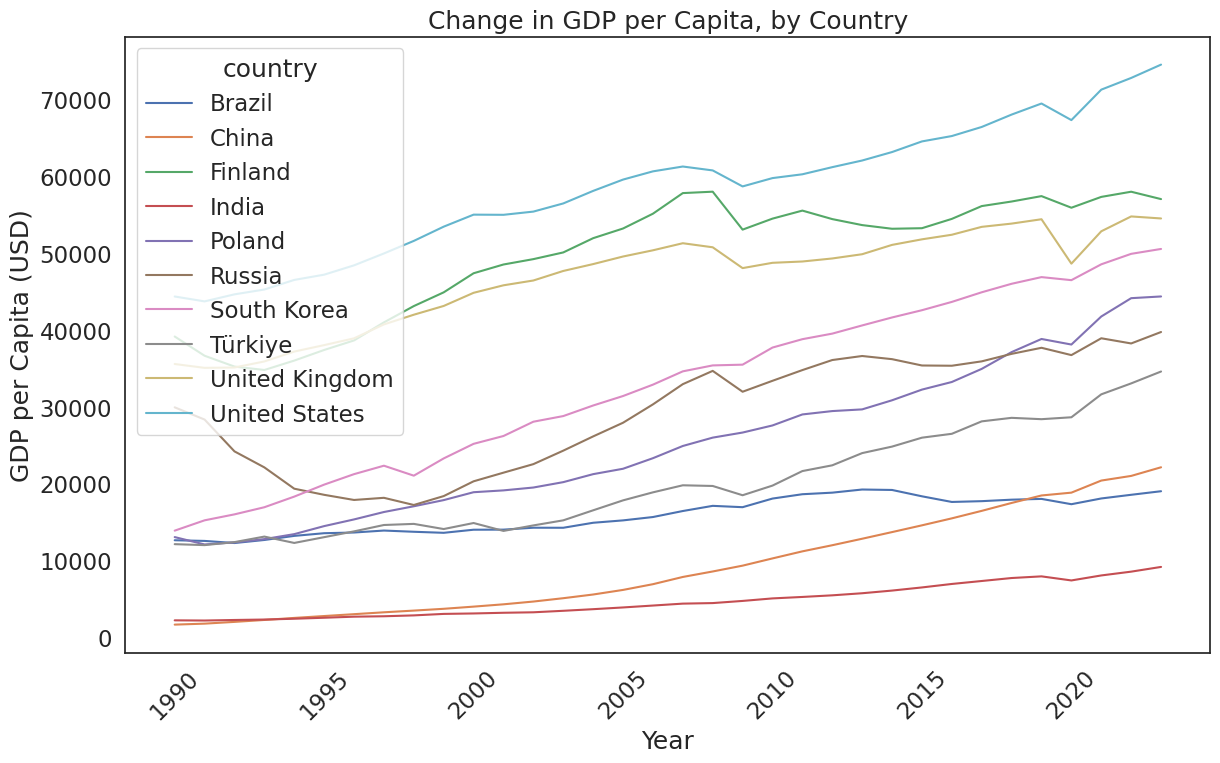

In [54]:
long1_df = gdp_df.melt(id_vars=['country'], var_name='year', value_name='gdp/capita')

# Plotting using seaborn
plt.figure(figsize=(14, 8))  # Set figure size for better visibility
sns.lineplot(data=long1_df, x='year', y='gdp/capita', hue='country')

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('GDP per Capita (USD)')  # Label for the y-axis
plt.title('Change in GDP per Capita, by Country')  # Title of the chart

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [55]:
gdp_growth = gdp_df.copy()

# Apply pct_change() to all year columns, ignoring the 'country' column
gdp_growth.iloc[:, 1:] = gdp_growth.iloc[:, 1:].pct_change(axis=1) * 100

# Rename the columns to distinguish them from patent growth data

gdp_growth

year,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
25,Brazil,NaN,-0.686496,-2.188504,3.238679,4.210940,2.632052,0.672975,1.869241,-1.143601,...,-0.303168,-4.306399,-4.010118,0.587665,1.090413,0.562967,-3.835504,4.317924,2.646326,2.501832
38,China,NaN,7.782088,12.833212,12.581994,11.766386,9.754960,8.776432,8.124492,6.816065,...,6.750764,6.420734,6.238214,6.301864,6.251696,5.575322,1.995559,8.351720,2.964154,5.358859
66,Finland,NaN,-6.393259,-3.853151,-1.258737,3.517213,3.837301,3.323162,6.081766,5.174695,...,-0.888801,0.136120,2.277545,3.061234,1.058841,1.238129,-2.631006,2.521977,1.174537,-1.656118
86,India,NaN,-1.110275,3.259396,2.574088,4.500567,5.430704,5.422263,2.023752,4.148493,...,6.063982,6.715669,6.973949,5.561184,5.292122,2.796756,-6.690469,8.790930,6.144947,7.201843
153,Poland,NaN,-7.344789,2.201070,3.474685,5.070853,7.783277,6.013200,6.289311,4.584207,...,3.998318,4.501382,3.075472,5.139335,6.246074,4.606008,-1.863915,9.580038,5.712273,0.505670
158,Russia,NaN,-5.318759,-14.613922,-8.619683,-12.539795,-4.122766,-3.614982,1.567719,-5.143118,...,-1.121941,-2.276205,-0.090477,1.613863,2.716594,2.142024,-2.526802,5.965544,-1.733192,3.893620
179,South Korea,NaN,9.687003,5.100787,5.797281,8.174767,8.517152,6.867620,5.179632,-5.811815,...,2.556212,2.268432,2.539149,2.870191,2.462248,1.888918,-0.846212,4.439123,2.805235,1.278234
195,Türkiye,NaN,-1.036286,3.260168,5.810135,-6.311170,6.126978,5.773536,6.034112,0.987951,...,3.533487,4.678599,1.942260,6.116956,1.628173,-0.612624,0.876211,10.429413,4.499457,4.684870
202,United Kingdom,NaN,-1.408485,0.129928,2.244416,3.581960,2.260787,2.321133,4.654745,3.101778,...,2.437438,1.416110,1.152187,1.961446,0.792604,1.052794,-10.624412,8.664947,3.656459,-0.480662
203,United States,NaN,-1.434243,2.096668,1.405719,2.761108,1.468932,2.572466,3.197167,3.272229,...,1.774697,2.190430,1.084258,1.811474,2.425877,2.117749,-3.106490,5.888306,2.136359,2.382680


In [44]:
gdpgrowth_pivot = gdp_growth.pivot(index="country", columns="year", values="gdp/capita").reset_index()
gdpgrowth_pivot

KeyError: 'year'

In [25]:
gdp_growth.describe()

,GDP_1990,GDP_1991,GDP_1992,GDP_1993,GDP_1994,GDP_1995,GDP_1996,GDP_1997,GDP_1998,GDP_1999,...,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018,GDP_2019,GDP_2020,GDP_2021,GDP_2022,GDP_2023
count,0.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,NaN,-0.726350,0.822565,2.724858,2.473283,4.368938,3.812780,4.502194,1.598688,4.056561,...,2.480099,2.174487,2.118244,3.502521,2.996464,2.136804,-2.925304,6.894992,3.000655,2.567083
std,NaN,5.568270,7.052629,5.410991,6.973811,4.087317,3.563392,2.236768,4.330055,4.314549,...,2.729944,3.603820,3.093712,2.094474,2.140417,1.838984,3.631269,2.629409,2.274790,2.760691
min,NaN,-7.344789,-14.613922,-8.619683,-12.539795,-4.122766,-3.614982,1.567719,-5.811815,-4.547474,...,-1.121941,-4.306399,-4.010118,0.587665,0.792604,-0.612624,-10.624412,2.521977,-1.733192,-1.656118
25%,NaN,-4.347630,-1.608896,1.615393,2.950134,2.353603,2.383967,2.317106,-0.610713,2.934465,...,0.216299,0.456118,1.101240,1.848967,1.224853,1.099128,-3.653251,4.801419,2.263851,0.698811
50%,NaN,-1.259380,2.148869,2.906383,3.896450,4.634002,4.372712,4.917188,3.187004,4.427568,...,2.496825,2.229431,2.109903,2.965713,2.444063,2.003333,-2.578904,7.158632,2.884695,2.442256
75%,NaN,-0.773943,3.259975,5.216632,4.928281,7.369202,5.953284,6.069853,4.475278,6.732491,...,3.882110,4.634295,2.941391,5.455722,4.648240,2.633073,-1.100638,8.759434,4.288707,4.487057
max,NaN,9.687003,12.833212,12.581994,11.766386,9.754960,8.776432,8.124492,6.816065,10.677447,...,6.750764,6.715669,6.973949,6.301864,6.251696,5.575322,1.995559,10.429413,6.144947,7.201843


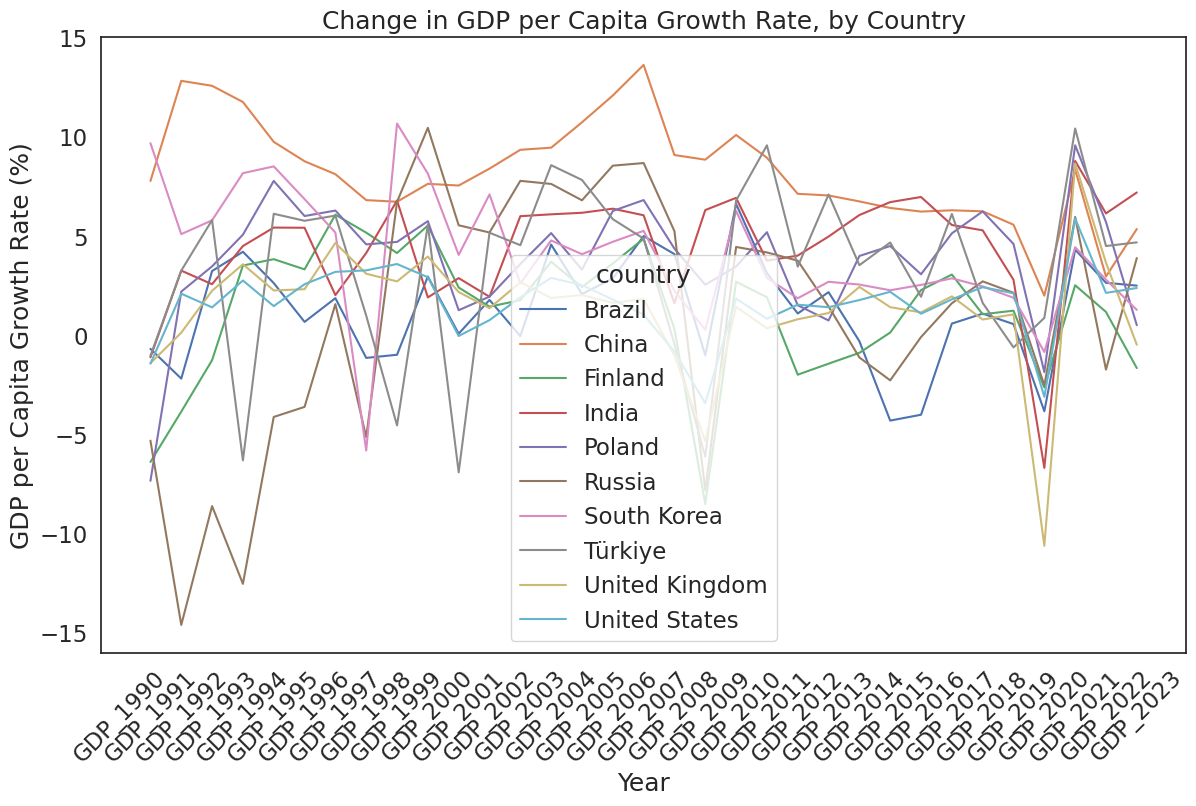

In [24]:
longgdpgrowth_df = gdp_growth.melt(id_vars=['country'], var_name='year', value_name='gdp/capita')

# Plotting using seaborn
plt.figure(figsize=(14, 8))  # Set figure size for better visibility
sns.lineplot(data=longgdpgrowth_df, x='year', y='gdp/capita', hue='country')

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('GDP per Capita Growth Rate (%)')  # Label for the y-axis
plt.title('Change in GDP per Capita Growth Rate, by Country')  # Title of the chart

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [7]:
patents2_df=pd.read_csv('https://raw.githubusercontent.com/ella4-boop/patents/refs/heads/main/patents2.csv')
patents2_df.head(11)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,126.8,121.8,110.9,122.3,107.9,123.5,116.6,119.0,107.2,...,121.4,125.4,145.2,151.0,134.9,146.2,146.0,123.2,112.7,123.8
1,China,312.2,361.2,429.9,455.1,372.9,300.6,317.7,316.9,318.9,...,4263.7,4814.1,5607.1,5420.1,5681.0,4784.0,5060.2,4949.9,4934.1,4875.0
2,Finland,1054.6,1155.4,1154.8,1227.0,1256.6,1076.0,1436.9,1470.9,1495.5,...,1238.0,1121.0,1019.8,1033.2,988.2,948.6,1118.6,1144.6,1078.6,1247.2
3,India,60.2,65.8,61.4,56.8,70.0,63.3,63.3,70.5,77.5,...,150.9,146.0,141.5,150.2,153.6,176.6,223.0,230.7,316.5,380.5
4,Poland,826.4,733.5,610.4,541.2,517.3,468.3,410.0,383.3,367.5,...,379.5,431.4,373.1,332.6,339.2,299.2,314.5,256.3,238.8,285.8
5,Republic of Korea,1525.9,2010.1,2278.1,2866.2,3492.0,6607.9,7073.6,6560.6,5194.4,...,7763.1,7698.3,7305.8,6893.9,6845.6,7067.8,7486.4,7406.8,7121.4,7308.8
6,Russian Federation,1098.3,1098.3,1098.3,867.9,740.1,637.7,680.0,562.4,646.8,...,459.3,568.4,520.7,435.6,464.3,426.2,446.1,348.9,345.8,363.9
7,Türkiye,20.3,21.6,26.3,21.8,20.5,21.4,22.1,22.1,22.0,...,269.8,285.2,320.9,402.2,332.2,355.6,356.6,337.0,334.4,308.1
8,United Kingdom,948.8,955.4,932.7,904.2,854.7,844.8,951.4,923.8,957.4,...,604.0,590.4,553.2,528.2,520.0,500.7,543.4,486.1,456.6,470.5
9,United States of America,817.9,794.5,806.5,848.9,875.4,985.5,818.9,874.4,945.8,...,1416.5,1391.6,1399.9,1359.7,1281.0,1250.2,1208.9,1111.5,1049.1,1118.7


In [8]:
country_replacements = {
    "Russian Federation": "Russia",  # Example of changing 'Russian Federation' to 'Russia'
    "United States of America": "United States",  # Another example
    "Republic of Korea": "South Korea"  # If you want to standardize the name
}

# Replace country names in the 'country' column
patents2_df['country'] = patents2_df['country'].replace(country_replacements)

# Check the result
patents2_df.head(11)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,126.8,121.8,110.9,122.3,107.9,123.5,116.6,119.0,107.2,...,121.4,125.4,145.2,151.0,134.9,146.2,146.0,123.2,112.7,123.8
1,China,312.2,361.2,429.9,455.1,372.9,300.6,317.7,316.9,318.9,...,4263.7,4814.1,5607.1,5420.1,5681.0,4784.0,5060.2,4949.9,4934.1,4875.0
2,Finland,1054.6,1155.4,1154.8,1227.0,1256.6,1076.0,1436.9,1470.9,1495.5,...,1238.0,1121.0,1019.8,1033.2,988.2,948.6,1118.6,1144.6,1078.6,1247.2
3,India,60.2,65.8,61.4,56.8,70.0,63.3,63.3,70.5,77.5,...,150.9,146.0,141.5,150.2,153.6,176.6,223.0,230.7,316.5,380.5
4,Poland,826.4,733.5,610.4,541.2,517.3,468.3,410.0,383.3,367.5,...,379.5,431.4,373.1,332.6,339.2,299.2,314.5,256.3,238.8,285.8
5,South Korea,1525.9,2010.1,2278.1,2866.2,3492.0,6607.9,7073.6,6560.6,5194.4,...,7763.1,7698.3,7305.8,6893.9,6845.6,7067.8,7486.4,7406.8,7121.4,7308.8
6,Russia,1098.3,1098.3,1098.3,867.9,740.1,637.7,680.0,562.4,646.8,...,459.3,568.4,520.7,435.6,464.3,426.2,446.1,348.9,345.8,363.9
7,Türkiye,20.3,21.6,26.3,21.8,20.5,21.4,22.1,22.1,22.0,...,269.8,285.2,320.9,402.2,332.2,355.6,356.6,337.0,334.4,308.1
8,United Kingdom,948.8,955.4,932.7,904.2,854.7,844.8,951.4,923.8,957.4,...,604.0,590.4,553.2,528.2,520.0,500.7,543.4,486.1,456.6,470.5
9,United States,817.9,794.5,806.5,848.9,875.4,985.5,818.9,874.4,945.8,...,1416.5,1391.6,1399.9,1359.7,1281.0,1250.2,1208.9,1111.5,1049.1,1118.7


In [9]:
patents2_summary = patents2_df.describe()
patents2_summary

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,679.14000,731.760000,750.930000,791.14000,830.740000,1112.900000,1189.050000,1130.390000,1013.30000,1030.790000,...,1666.620000,1717.180000,1738.720000,1670.670000,1674.000000,1595.510000,1690.370000,1639.500000,1598.800000,1648.230000
std,516.85002,619.957492,681.920577,834.78127,1018.714861,1968.010706,2115.744756,1961.531243,1543.25705,1529.652163,...,2472.916561,2519.295285,2548.266691,2419.704672,2460.440781,2369.895782,2507.376105,2486.269383,2412.279666,2438.466413
min,20.30000,21.600000,26.300000,21.80000,20.500000,21.400000,22.100000,22.100000,22.00000,30.300000,...,121.400000,125.400000,141.500000,150.200000,134.900000,146.200000,146.000000,123.200000,112.700000,123.800000
25%,173.15000,181.650000,190.650000,205.50000,174.150000,167.775000,166.875000,168.475000,160.12500,173.800000,...,297.225000,321.750000,333.950000,350.000000,333.950000,313.300000,325.025000,276.475000,320.975000,322.050000
50%,822.15000,764.000000,708.450000,695.05000,628.700000,553.000000,545.000000,472.850000,507.15000,535.900000,...,531.650000,579.400000,536.950000,481.900000,492.150000,463.450000,494.750000,417.500000,401.200000,425.500000
75%,1028.15000,1062.575000,1056.900000,895.12500,870.225000,950.325000,918.275000,911.450000,954.50000,1005.075000,...,1371.875000,1323.950000,1304.875000,1278.075000,1207.800000,1174.800000,1186.325000,1136.325000,1071.225000,1215.075000
max,1525.90000,2010.100000,2278.100000,2866.20000,3492.000000,6607.900000,7073.600000,6560.600000,5194.40000,5155.000000,...,7763.100000,7698.300000,7305.800000,6893.900000,6845.600000,7067.800000,7486.400000,7406.800000,7121.400000,7308.800000


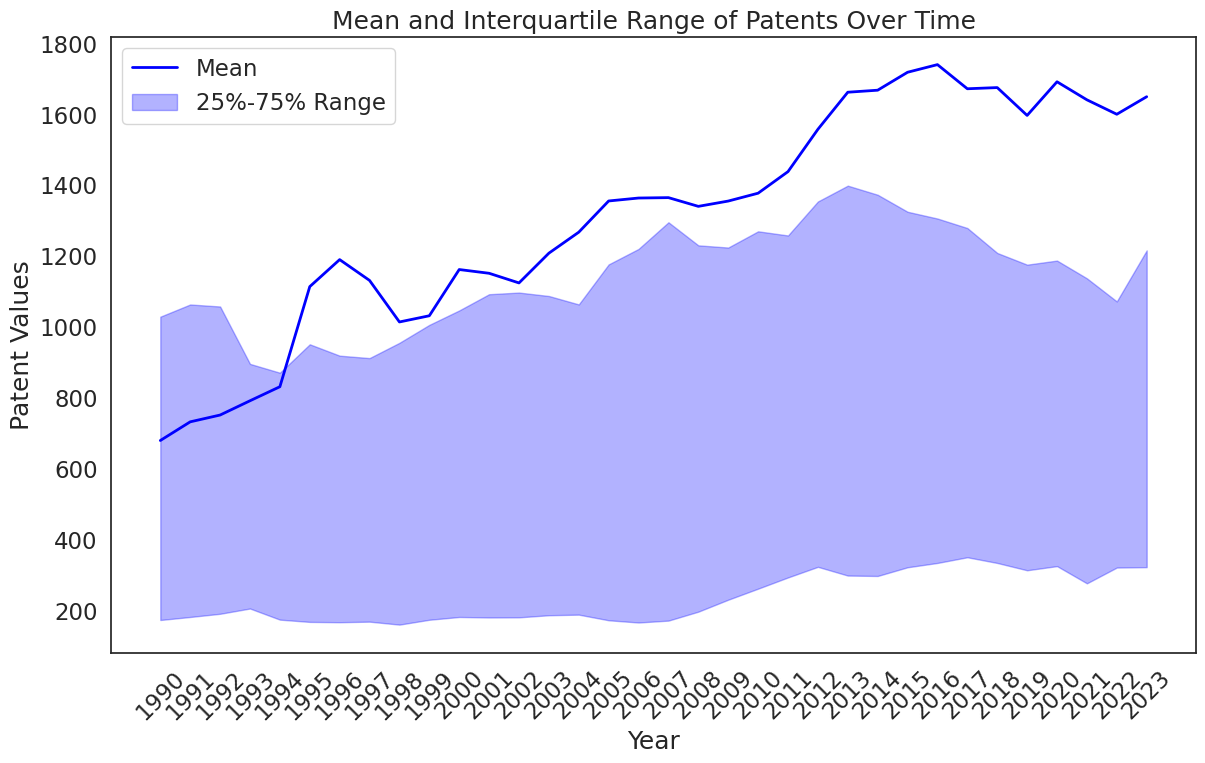

In [10]:
years = patents2_summary.columns  # Assuming years are columns
mean_values = patents2_summary.loc['mean']
min_values = patents2_summary.loc['25%']
max_values = patents2_summary.loc['75%']
plt.figure(figsize=(14, 8))
# Plot the mean values as a line
plt.plot(years, mean_values, label='Mean', color='blue', linewidth=2)

# Fill the area between the min and max values
plt.fill_between(years, min_values, max_values, color='blue', alpha=0.3, label='25%-75% Range')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Patent Applications per $100 billion GDP (USD)')
plt.title('Mean and Interquartile Range of Patents Over Time')
plt.xticks(rotation=45)
# Add a legend
plt.legend()

# Display the plot
plt.show()

In [11]:
pdata_1990 = patents2_df[['country','1990']]
pdata_1990_sorted= pdata_1990.sort_values(by='1990', ascending=False)
pdata_1990_sorted

,country,1990
5,South Korea,1525.9
6,Russia,1098.3
2,Finland,1054.6
8,United Kingdom,948.8
4,Poland,826.4
9,United States,817.9
1,China,312.2
0,Brazil,126.8
3,India,60.2
7,Türkiye,20.3


In [12]:
pdata_2023 = patents2_df[['country','2023']]
pdata_2023_sorted= pdata_2023.sort_values(by='2023', ascending=False)
pdata_2023_sorted

,country,2023
5,South Korea,7308.8
1,China,4875.0
2,Finland,1247.2
9,United States,1118.7
8,United Kingdom,470.5
3,India,380.5
6,Russia,363.9
7,Türkiye,308.1
4,Poland,285.8
0,Brazil,123.8


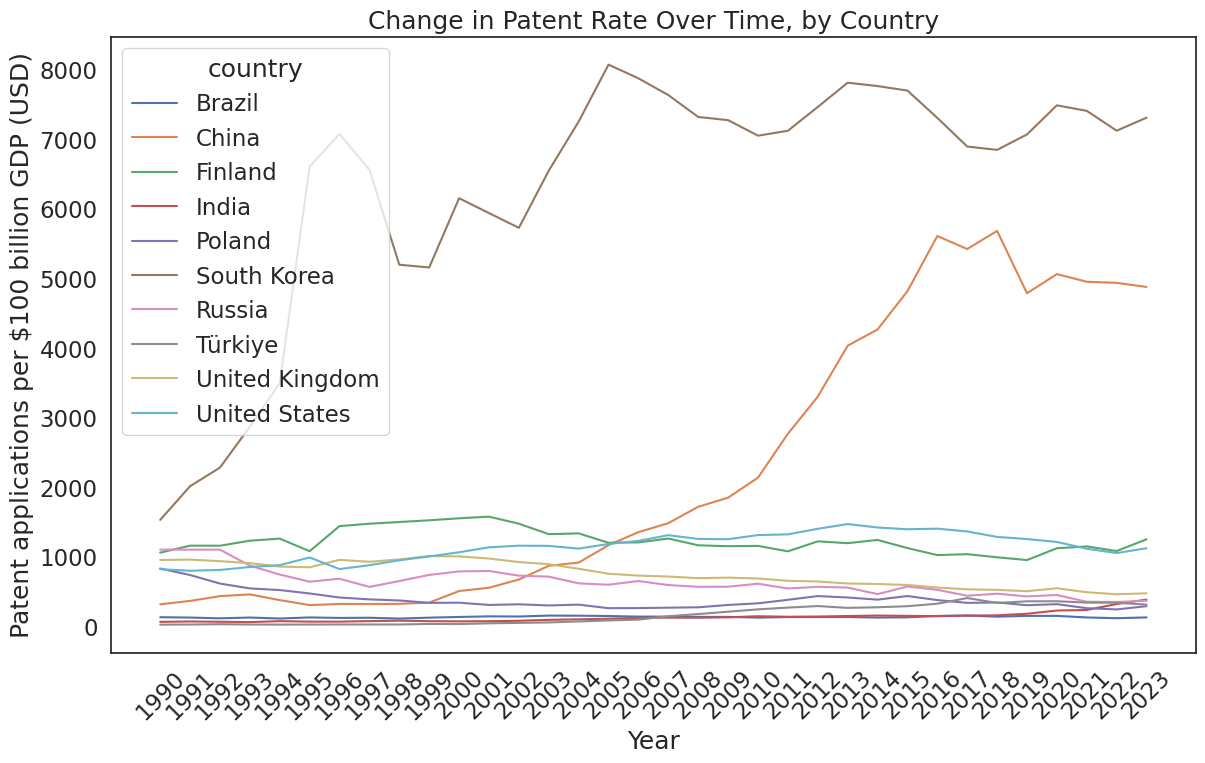

In [13]:
long_df = patents2_df.melt(id_vars=['country'], var_name='year', value_name='patents')

# Plotting using seaborn
plt.figure(figsize=(14, 8))  # Set figure size for better visibility
sns.lineplot(data=long_df, x='year', y='patents', hue='country')

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Patent applications per $100 billion GDP (USD)')  # Label for the y-axis
plt.title('Change in Patent Rate Over Time, by Country')  # Title of the chart

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [14]:
trademarks2_df=pd.read_csv('https://raw.githubusercontent.com/ella4-boop/patents/refs/heads/main/trademarks2.csv')
trademarks2_df.head(11)

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,2943.2,2956.1,2656.8,2707.9,3056.3,2900.1,2977.4,3372.2,3250.9,...,3332.9,3530.9,3850.4,4387.6,4767.5,5852.3,7212.6,9154.5,9120.3,9641.8
1,China,7312.3,7382.8,7387.1,5845.8,5204.2,5975.2,7088.2,8466.1,9258.4,...,11389.6,13420.6,16411.9,24100.6,29049.7,29169.5,34303.1,31895.3,24606.8,22380.7
2,Finland,2976.0,3361.3,4531.9,4531.9,4643.6,4281.7,4402.8,4623.8,4599.4,...,3984.3,3947.4,4219.5,3513.0,3328.3,3353.9,3812.2,3555.5,2982.3,2944.6
3,India,1538.7,1635.5,1821.1,2243.9,2220.5,2317.9,2735.9,2664.1,2521.4,...,2508.6,2908.2,2837.3,2434.2,2807.8,2925.9,3683.4,3826.1,3685.7,3613.3
4,Poland,4520.7,4522.6,4570.4,4752.0,4951.6,3983.1,3968.8,4193.0,3785.0,...,3912.3,3727.2,3954.7,3260.6,2975.5,2875.6,3073.8,3437.2,2784.5,3057.5
5,Republic of Korea,8257.4,8563.3,8571.6,8748.2,8344.4,7656.0,6952.9,6854.0,7098.3,...,7771.1,8811.8,8208.6,7853.1,8757.1,9411.8,11171.6,11915.7,10399.7,10124.7
6,Russian Federation,1863.5,2064.1,2149.8,2330.6,2276.0,2850.3,3180.3,2978.1,3082.4,...,3355.0,3108.6,3707.3,4398.7,3736.5,4425.2,6290.3,5711.5,6693.7,8691.7
7,Türkiye,7884.7,7884.7,7884.7,7884.7,8286.2,8105.9,9478.5,9478.5,11509.3,...,10367.3,9580.0,9226.9,9530.5,9075.0,10606.4,13875.6,14843.3,15897.7,12466.1
8,United Kingdom,1837.6,1891.2,2940.3,3178.8,2857.8,2911.2,2911.2,3341.6,3605.6,...,4031.5,4222.4,4381.8,4659.9,4832.4,4814.5,6717.5,6310.7,5029.3,5206.0
9,United States of America,1467.3,1555.3,1603.7,1757.1,1669.8,1553.8,1595.2,1700.0,1716.8,...,1796.3,1873.3,1841.6,1981.1,2003.4,2018.0,2463.7,2338.6,2054.9,1935.3


In [15]:
trademarks2_df['country'] = trademarks2_df['country'].replace(country_replacements)

# Check the result
trademarks2_df.head(11)

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,2943.2,2956.1,2656.8,2707.9,3056.3,2900.1,2977.4,3372.2,3250.9,...,3332.9,3530.9,3850.4,4387.6,4767.5,5852.3,7212.6,9154.5,9120.3,9641.8
1,China,7312.3,7382.8,7387.1,5845.8,5204.2,5975.2,7088.2,8466.1,9258.4,...,11389.6,13420.6,16411.9,24100.6,29049.7,29169.5,34303.1,31895.3,24606.8,22380.7
2,Finland,2976.0,3361.3,4531.9,4531.9,4643.6,4281.7,4402.8,4623.8,4599.4,...,3984.3,3947.4,4219.5,3513.0,3328.3,3353.9,3812.2,3555.5,2982.3,2944.6
3,India,1538.7,1635.5,1821.1,2243.9,2220.5,2317.9,2735.9,2664.1,2521.4,...,2508.6,2908.2,2837.3,2434.2,2807.8,2925.9,3683.4,3826.1,3685.7,3613.3
4,Poland,4520.7,4522.6,4570.4,4752.0,4951.6,3983.1,3968.8,4193.0,3785.0,...,3912.3,3727.2,3954.7,3260.6,2975.5,2875.6,3073.8,3437.2,2784.5,3057.5
5,South Korea,8257.4,8563.3,8571.6,8748.2,8344.4,7656.0,6952.9,6854.0,7098.3,...,7771.1,8811.8,8208.6,7853.1,8757.1,9411.8,11171.6,11915.7,10399.7,10124.7
6,Russia,1863.5,2064.1,2149.8,2330.6,2276.0,2850.3,3180.3,2978.1,3082.4,...,3355.0,3108.6,3707.3,4398.7,3736.5,4425.2,6290.3,5711.5,6693.7,8691.7
7,Türkiye,7884.7,7884.7,7884.7,7884.7,8286.2,8105.9,9478.5,9478.5,11509.3,...,10367.3,9580.0,9226.9,9530.5,9075.0,10606.4,13875.6,14843.3,15897.7,12466.1
8,United Kingdom,1837.6,1891.2,2940.3,3178.8,2857.8,2911.2,2911.2,3341.6,3605.6,...,4031.5,4222.4,4381.8,4659.9,4832.4,4814.5,6717.5,6310.7,5029.3,5206.0
9,United States,1467.3,1555.3,1603.7,1757.1,1669.8,1553.8,1595.2,1700.0,1716.8,...,1796.3,1873.3,1841.6,1981.1,2003.4,2018.0,2463.7,2338.6,2054.9,1935.3


In [16]:
tdata_2004 = trademarks2_df[['country','2004']]
tdata_2004_sorted= tdata_2004.sort_values(by='2004', ascending=False)
tdata_2004_sorted

,country,2004
5,South Korea,8257.4
7,Türkiye,7884.7
1,China,7312.3
4,Poland,4520.7
2,Finland,2976.0
0,Brazil,2943.2
6,Russia,1863.5
8,United Kingdom,1837.6
3,India,1538.7
9,United States,1467.3


In [17]:
tdata_2023 = trademarks2_df[['country','2023']]
tdata_2023_sorted= tdata_2023.sort_values(by='2023', ascending=False)
tdata_2023_sorted

,country,2023
1,China,22380.7
7,Türkiye,12466.1
5,South Korea,10124.7
0,Brazil,9641.8
6,Russia,8691.7
8,United Kingdom,5206.0
3,India,3613.3
4,Poland,3057.5
2,Finland,2944.6
9,United States,1935.3


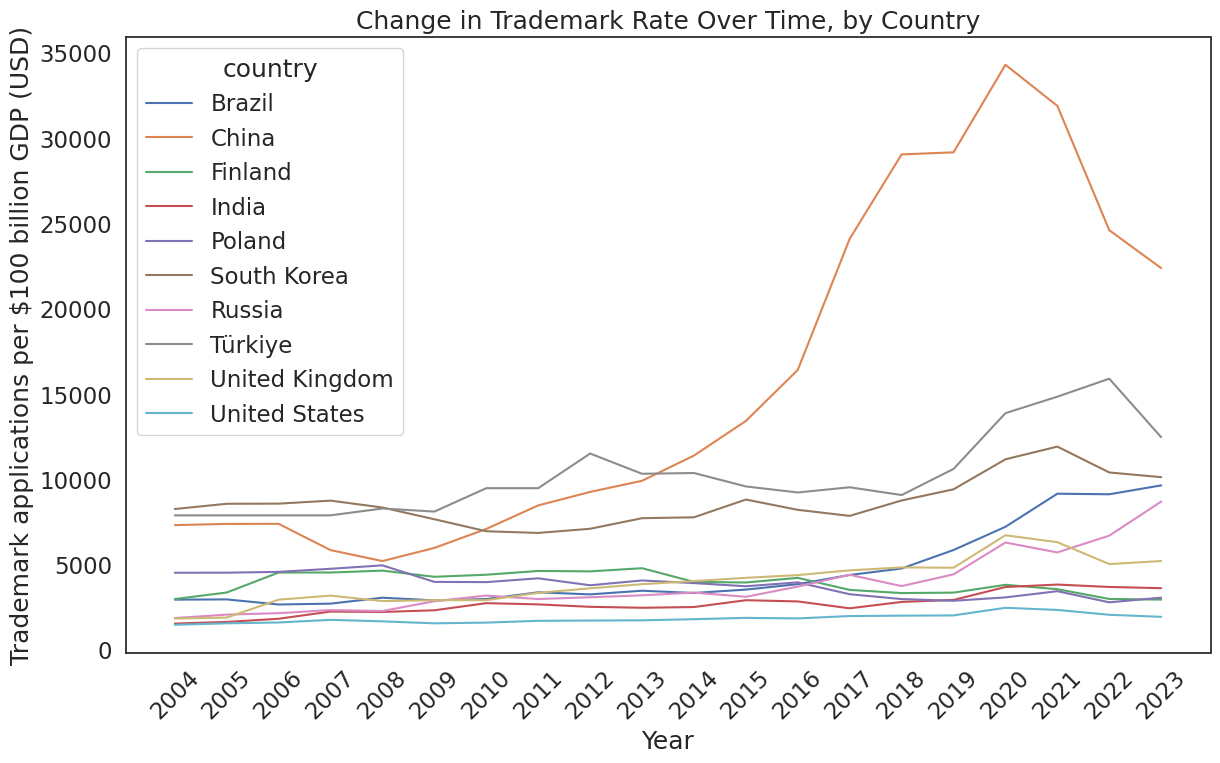

In [18]:
long2_df = trademarks2_df.melt(id_vars=['country'], var_name='year', value_name='trademarks')

# Plotting using seaborn
plt.figure(figsize=(14, 8))  # Set figure size for better visibility
sns.lineplot(data=long2_df, x='year', y='trademarks', hue='country')

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Trademark applications per $100 billion GDP (USD)')  # Label for the y-axis
plt.title('Change in Trademark Rate Over Time, by Country')  # Title of the chart

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [19]:
trademarks2_summary = trademarks2_df.describe()
trademarks2_summary

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4060.140000,4181.690000,4411.740000,4398.090000,4351.040000,4253.520000,4529.120000,4767.140000,5042.750000,5150.59000,5244.890000,5513.040000,5864.000000,6611.930000,7133.32000,7545.310000,9260.380000,9298.840000,8325.490000,8006.170000
std,2754.818318,2760.047594,2650.284929,2439.312652,2416.303673,2263.073447,2492.616153,2616.044447,3199.479156,3065.61138,3363.578231,3756.487728,4354.534266,6576.907232,8068.84313,8108.860424,9526.721843,8917.824986,7156.824998,6220.521965
min,1467.300000,1555.300000,1603.700000,1757.100000,1669.800000,1553.800000,1595.200000,1700.000000,1716.800000,1729.30000,1796.300000,1873.300000,1841.600000,1981.100000,2003.40000,2018.000000,2463.700000,2338.600000,2054.900000,1935.300000
25%,1844.075000,1934.425000,2276.550000,2424.925000,2421.450000,2862.750000,2927.750000,3068.975000,3124.525000,3262.35000,3338.425000,3214.175000,3743.075000,3323.700000,3063.70000,3032.900000,3715.600000,3623.150000,3158.150000,3196.450000
50%,2959.600000,3158.700000,3736.100000,3855.350000,3849.950000,3447.150000,3574.550000,3782.600000,3695.300000,3957.50000,3948.300000,3837.300000,4087.100000,4393.150000,4252.00000,4619.850000,6503.900000,6011.100000,5861.500000,6948.850000
75%,6614.400000,6667.750000,6682.925000,5572.350000,5141.050000,5551.825000,6315.375000,6296.450000,6473.575000,6984.72500,6836.200000,7664.450000,7251.900000,7054.800000,7775.92500,8521.925000,10181.850000,11225.400000,10079.850000,10003.975000
max,8257.400000,8563.300000,8571.600000,8748.200000,8344.400000,8105.900000,9478.500000,9478.500000,11509.300000,10322.50000,11389.600000,13420.600000,16411.900000,24100.600000,29049.70000,29169.500000,34303.100000,31895.300000,24606.800000,22380.700000


In [20]:
trademarks_growth = trademarks2_df.copy()

# Apply pct_change() to all year columns, ignoring the 'country' column
trademarks_growth.iloc[:, 1:] = trademarks_growth.iloc[:, 1:].pct_change(axis=1) * 100
trademarks_growth

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,NaN,0.438298,-10.124827,1.923366,12.866059,-5.110755,2.665425,13.259891,-3.597058,...,-3.812410,5.940772,9.048684,13.951797,8.658492,22.754064,23.243853,26.923717,-0.373587,5.718014
1,China,NaN,0.964129,0.058243,-20.864751,-10.975401,14.814957,18.626992,19.439350,9.358500,...,14.923415,17.832057,22.288869,46.848323,20.535173,0.412397,17.599205,-7.019191,-22.851329,-9.046686
2,Finland,NaN,12.946909,34.825811,0.000000,2.464750,-7.793522,2.828316,5.019533,-0.527704,...,-16.726581,-0.926135,6.893145,-16.743690,-5.257615,0.769161,13.664689,-6.733645,-16.121502,-1.264125
3,India,NaN,6.291025,11.348212,23.216737,-1.042827,4.386399,18.033565,-2.624365,-5.356406,...,1.727494,15.929204,-2.437934,-14.207169,15.347958,4.206140,25.889470,3.874138,-3.669533,-1.964349
4,Poland,NaN,0.042029,1.056914,3.973394,4.200337,-19.559334,-0.359017,5.649063,-9.730503,...,-3.796690,-4.731232,6.103778,-17.551268,-8.743789,-3.357419,6.892475,11.822500,-18.989294,9.804274
5,South Korea,NaN,3.704556,0.096925,2.060292,-4.615807,-8.249844,-9.183647,-1.422428,3.564342,...,0.686698,13.391926,-6.845366,-4.330824,11.511378,7.476219,18.697805,6.660639,-12.722710,-2.644307
6,Russia,NaN,10.764690,4.151931,8.410085,-2.342744,25.232865,11.577729,-6.357891,3.502233,...,5.014398,-7.344262,19.259474,18.649691,-15.054448,18.431687,42.147248,-9.201469,17.196883,29.848962
7,Türkiye,NaN,0.000000,0.000000,0.000000,5.092140,-2.175907,16.933345,0.000000,21.425331,...,0.434003,-7.594070,-3.685804,3.290379,-4.779392,16.874931,30.822899,6.974113,7.103542,-21.585512
8,United Kingdom,NaN,2.916848,55.472716,8.111417,-10.098150,1.868570,0.000000,14.784281,7.900407,...,4.760544,4.735210,3.775104,6.346707,3.701796,-0.370416,39.526431,-6.055824,-20.305196,3.513411
9,United States,NaN,5.997410,3.111940,9.565380,-4.968414,-6.946940,2.664436,6.569709,0.988235,...,3.874400,4.286589,-1.692201,7.574935,1.125637,0.728761,22.086224,-5.077729,-12.131190,-5.820235


In [59]:
gdp_df.columns = ['country'] + [f'gdp_{col}' for col in gdp_df.columns[1:]]
patents2_df.columns = ['country'] + [f'patents_{col}' for col in patents2_df.columns[1:]]

merged_df = pd.merge(gdp_df, patents2_df, on="country", suffixes=('_gdp', '_patents'))
merged_df.head(11)

,country,gdp_1990,gdp_1991,gdp_1992,gdp_1993,gdp_1994,gdp_1995,gdp_1996,gdp_1997,gdp_1998,...,patents_2014,patents_2015,patents_2016,patents_2017,patents_2018,patents_2019,patents_2020,patents_2021,patents_2022,patents_2023
0,Brazil,12633.288,12546.5610,12271.9790,12669.4290,13202.9310,13550.4390,13641.6300,13896.6250,13737.7030,...,121.4,125.4,145.2,151.0,134.9,146.2,146.0,123.2,112.7,123.8
1,China,1645.579,1773.6394,2001.2543,2253.0520,2518.1548,2763.7998,3006.3628,3250.6145,3472.1785,...,4263.7,4814.1,5607.1,5420.1,5681.0,4784.0,5060.2,4949.9,4934.1,4875.0
2,Finland,39167.863,36663.7600,35251.0500,34807.3320,36031.5800,37414.2200,38657.5550,41008.6170,43130.6880,...,1238.0,1121.0,1019.8,1033.2,988.2,948.6,1118.6,1144.6,1078.6,1247.2
3,India,2203.147,2178.6860,2249.6980,2307.6072,2411.4626,2542.4220,2680.2788,2734.5210,2847.9624,...,150.9,146.0,141.5,150.2,153.6,176.6,223.0,230.7,316.5,380.5
4,Poland,13044.731,12086.6230,12352.6580,12781.8740,13430.0240,14475.3200,15345.7500,16310.8920,17058.6170,...,379.5,431.4,373.1,332.6,339.2,299.2,314.5,256.3,238.8,285.8
5,Russia,29945.146,28352.4360,24209.0330,22122.2910,19348.2010,18550.5200,17879.9220,18160.2290,17226.2270,...,459.3,568.4,520.7,435.6,464.3,426.2,446.1,348.9,345.8,363.9
6,South Korea,13883.375,15228.2580,16005.0190,16932.8750,18317.0980,19877.1930,21242.2830,22342.5550,21044.0470,...,7763.1,7698.3,7305.8,6893.9,6845.6,7067.8,7486.4,7406.8,7121.4,7308.8
7,Türkiye,12124.939,11999.2900,12390.4870,13110.3910,12282.9720,13035.5470,13788.1590,14620.1520,14764.5920,...,269.8,285.2,320.9,402.2,332.2,355.6,356.6,337.0,334.4,308.1
8,United Kingdom,35586.742,35085.5080,35131.0940,35919.5820,37206.2070,38047.3600,38930.4900,40742.6050,42006.3500,...,604.0,590.4,553.2,528.2,520.0,500.7,543.4,486.1,456.6,470.5
9,United States,44378.523,43742.0270,44659.1520,45286.9340,46537.3550,47220.9570,48435.7000,49984.2700,51619.8700,...,1416.5,1391.6,1399.9,1359.7,1281.0,1250.2,1208.9,1111.5,1049.1,1118.7


In [60]:
merged_melted = pd.melt(merged_df, id_vars=['country'], value_vars=merged_df.columns[1:],
                        var_name='year', value_name='value')

# Separate 'gdp' and 'patents' into separate columns
merged_melted[['measure', 'year']] = merged_melted['year'].str.split('_', expand=True)
merged_melted['year'] = merged_melted['year'].astype(int)

In [61]:
gdp_data = merged_melted[merged_melted['measure'] == 'gdp']
patent_data = merged_melted[merged_melted['measure'] == 'patents']

# Merge GDP and patent data by year and country
merged_data = pd.merge(gdp_data, patent_data, on=['country', 'year'], suffixes=('_gdp', '_patents'))

In [65]:
merged_data.head(20)

,country,year,value_gdp,measure_gdp,value_patents,measure_patents
0,Brazil,1990,12633.2880,gdp,126.8,patents
1,China,1990,1645.5790,gdp,312.2,patents
2,Finland,1990,39167.8630,gdp,1054.6,patents
3,India,1990,2203.1470,gdp,60.2,patents
4,Poland,1990,13044.7310,gdp,826.4,patents
5,Russia,1990,29945.1460,gdp,1098.3,patents
6,South Korea,1990,13883.3750,gdp,1525.9,patents
7,Türkiye,1990,12124.9390,gdp,20.3,patents
8,United Kingdom,1990,35586.7420,gdp,948.8,patents
9,United States,1990,44378.5230,gdp,817.9,patents


In [70]:
import statsmodels.api as sm

# Prepare the independent and dependent variables for regression
X = merged_data['value_patents']  # Independent variables: Patent activity and Year
y = merged_data['value_gdp']  # Dependent variable: GDP per capita

# Add a constant term to the independent variables (for the intercept in OLS regression)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              value_gdp   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     11.87
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           0.000641
Time:                        10:50:50   Log-Likelihood:                -3816.3
No. Observations:                 340   AIC:                             7637.
Df Residuals:                     338   BIC:                             7644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.695e+04   1183.776     22.767

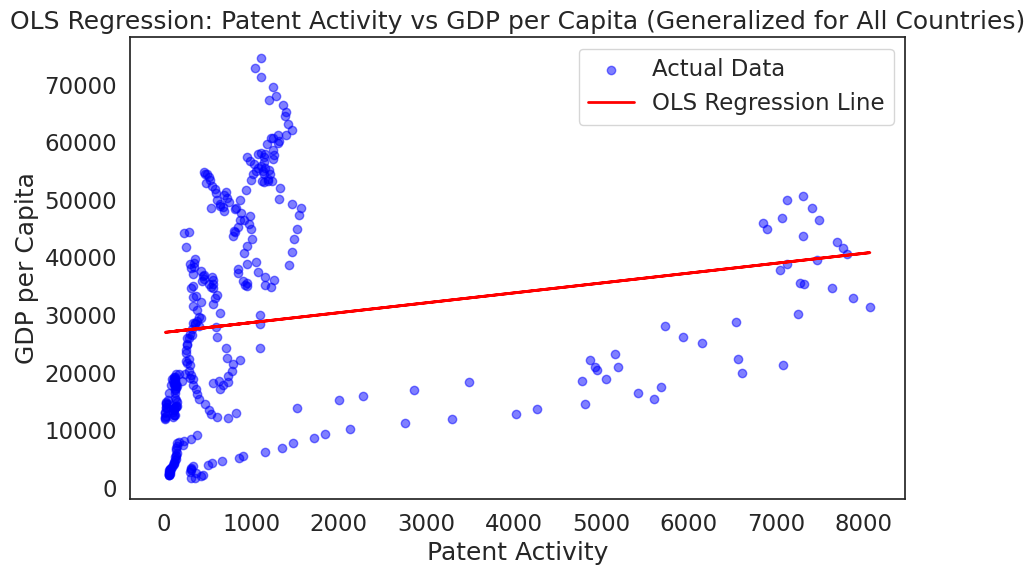

In [71]:
import matplotlib.pyplot as plt

# Get the predicted GDP values from the model for all the data
y_pred = model.predict(X)

# Plot actual data: Patent activity (x) vs. GDP per capita (y)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['value_patents'], merged_data['value_gdp'], color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line (generalized for all countries)
plt.plot(merged_data['value_patents'], y_pred, color='red', label='OLS Regression Line', linewidth=2)

# Add labels and title
plt.xlabel('Patent Activity')
plt.ylabel('GDP per Capita')
plt.title('OLS Regression: Patent Activity vs GDP per Capita (Generalized for All Countries)')
plt.legend()

# Show the plot
plt.show()

In [69]:
correlation_by_country = merged_data.groupby('country').apply(
    lambda x: x[['value_gdp', 'value_patents']].corr().iloc[0, 1]
)

# Show correlation by country
print(correlation_by_country)

country
Brazil            0.248297
China             0.961360
Finland          -0.329794
India             0.894749
Poland           -0.559418
Russia           -0.584575
South Korea       0.745739
Türkiye           0.939444
United Kingdom   -0.825025
United States     0.722528
dtype: float64


<ipython-input-69-d8ead5267635>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_country = merged_data.groupby('country').apply(


In [72]:

merged_data_filtered = merged_data[['country', 'year', 'value_gdp']]

# Pivot the data: 'year' becomes the index, 'country' becomes columns, and 'value_gdp' becomes the values
gdp_pivot = merged_data_filtered.pivot(index='year', columns='country', values='value_gdp')

# Display the resulting DataFrame
gdp_pivot.head()

country,Brazil,China,Finland,India,Poland,Russia,South Korea,Türkiye,United Kingdom,United States
year,,,,,,,,,,
1990,12633.288,1645.5790,39167.863,2203.1470,13044.731,29945.146,13883.375,12124.939,35586.742,44378.523
1991,12546.561,1773.6394,36663.760,2178.6860,12086.623,28352.436,15228.258,11999.290,35085.508,43742.027
1992,12271.979,2001.2543,35251.050,2249.6980,12352.658,24209.033,16005.019,12390.487,35131.094,44659.152
1993,12669.429,2253.0520,34807.332,2307.6072,12781.874,22122.291,16932.875,13110.391,35919.582,45286.934
1994,13202.931,2518.1548,36031.580,2411.4626,13430.024,19348.201,18317.098,12282.972,37206.207,46537.355


In [75]:
gdp2_growth = gdp_pivot.pct_change(axis='index') * 100
gdp2_growth = gdp2_growth.drop(1990)
# Display the resulting DataFrame
gdp2_growth.head()

country,Brazil,China,Finland,India,Poland,Russia,South Korea,Türkiye,United Kingdom,United States
year,,,,,,,,,,
1991,-0.686496,7.782088,-6.393259,-1.110275,-7.344789,-5.318759,9.687003,-1.036286,-1.408485,-1.434243
1992,-2.188504,12.833212,-3.853151,3.259396,2.201070,-14.613922,5.100787,3.260168,0.129928,2.096668
1993,3.238679,12.581994,-1.258737,2.574088,3.474685,-8.619683,5.797281,5.810135,2.244416,1.405719
1994,4.210940,11.766386,3.517213,4.500567,5.070853,-12.539795,8.174767,-6.311170,3.581960,2.761108
1995,2.632052,9.754960,3.837301,5.430704,7.783277,-4.122766,8.517152,6.126978,2.260787,1.468932


In [76]:
gdp2_growth.describe()

country,Brazil,China,Finland,India,Poland,Russia,South Korea,Türkiye,United Kingdom,United States
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.280968,8.225700,1.200835,4.453235,3.824855,1.055532,4.044179,3.325421,1.349259,1.601137
std,2.642951,2.625024,3.315863,2.903040,3.040859,6.238436,3.230909,4.461373,3.073002,1.804522
min,-4.306399,1.995559,-8.514604,-6.690469,-7.344789,-14.613922,-5.811815,-6.915478,-10.624412,-3.426833
25%,-0.303168,6.733490,-0.888801,2.881343,2.545616,-2.526802,2.462248,0.987951,0.805605,1.084258
50%,1.782039,8.124492,1.916853,5.422263,4.501382,2.142024,4.051008,4.678599,1.828882,1.846738
75%,2.962224,9.461551,3.517213,6.177024,5.712273,5.546719,5.797281,6.034112,2.437438,2.534113
max,6.627828,13.635812,6.081766,8.790930,9.580038,10.463717,10.677447,10.429413,8.664947,5.888306


In [77]:
merged2_data_filtered = merged_data[['country', 'year', 'value_patents']]

# Pivot the data: 'year' becomes the index, 'country' becomes columns, and 'value_gdp' becomes the values
gdp2_pivot = merged2_data_filtered.pivot(index='year', columns='country', values='value_patents')

# Display the resulting DataFrame
gdp2_pivot.head()

country,Brazil,China,Finland,India,Poland,Russia,South Korea,Türkiye,United Kingdom,United States
year,,,,,,,,,,
1990,126.8,312.2,1054.6,60.2,826.4,1098.3,1525.9,20.3,948.8,817.9
1991,121.8,361.2,1155.4,65.8,733.5,1098.3,2010.1,21.6,955.4,794.5
1992,110.9,429.9,1154.8,61.4,610.4,1098.3,2278.1,26.3,932.7,806.5
1993,122.3,455.1,1227.0,56.8,541.2,867.9,2866.2,21.8,904.2,848.9
1994,107.9,372.9,1256.6,70.0,517.3,740.1,3492.0,20.5,854.7,875.4


In [78]:
gdp3_growth = gdp2_pivot.pct_change(axis='index') * 100
gdp3_growth = gdp3_growth.drop(1990)
# Display the resulting DataFrame
gdp3_growth.head()

country,Brazil,China,Finland,India,Poland,Russia,South Korea,Türkiye,United Kingdom,United States
year,,,,,,,,,,
1991,-3.943218,15.695067,9.558126,9.302326,-11.241530,0.000000,31.732093,6.403941,0.695616,-2.860985
1992,-8.949097,19.019934,-0.051930,-6.686930,-16.782549,0.000000,13.332670,21.759259,-2.375968,1.510384
1993,10.279531,5.861828,6.252165,-7.491857,-11.336828,-20.977875,25.815372,-17.110266,-3.055645,5.257285
1994,-11.774325,-18.061964,2.412388,23.239437,-4.416112,-14.725199,21.833787,-5.963303,-5.474453,3.121687
1995,14.457831,-19.388576,-14.372115,-9.571429,-9.472260,-13.835968,89.229668,4.390244,-1.158301,12.577108


In [79]:
gdp3_growth.describe()

country,Brazil,China,Finland,India,Poland,Russia,South Korea,Türkiye,United Kingdom,United States
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.249271,9.584467,0.909732,6.241976,-2.664730,-2.686353,6.060865,9.664679,-1.999679,1.124521
std,8.159738,14.226941,9.428575,10.631907,10.167073,11.031630,18.266750,15.829397,4.644052,5.871304
min,-15.616438,-19.388576,-14.372115,-9.806452,-18.505564,-21.788837,-20.824315,-17.404276,-10.544718,-16.905124
25%,-6.102635,0.631114,-5.766207,-0.994200,-10.854999,-11.211573,-3.070218,-0.452489,-4.519161,-2.871634
50%,-0.076104,7.622769,0.817562,4.970760,-4.713257,-1.865156,-0.622144,7.043949,-2.900988,1.510384
75%,6.870861,16.472446,2.412388,11.374408,2.966381,5.234239,10.781663,19.547564,-1.158301,5.983290
max,15.789474,49.494949,33.540892,37.191157,19.681742,23.753538,89.229668,52.826087,12.618371,12.577108
